<a href="https://colab.research.google.com/github/jojogelato/marketing_campaign/blob/main/Boost_marketing_campaign_april.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

In [ ]:
# import dataset
df = pd.read_csv('marketing_campaign_data.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


#Understanding the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
#Menghitung jumlah missing value
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

terdapat 24 data di kolom marital status yang bernilai null

# Feature Engineering

In [ ]:
#drop kolom unnamed 
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
#Menambah beberapa feature untuk mengetahui korelasinya dengan conversion rate
df['age'] = 2022 - df['Year_Birth']
df['total_kids'] = df['Kidhome'] + df['Teenhome']
df['total_purchase'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df['total_spent'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['total_acc_campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] 

#conversion rate
def conversion (x,y) :
  if y== 0:
    return 0
  else :
    return x/y

df['conversion_rate'] = df.apply(lambda x: conversion(x['total_purchase'], x['NumWebVisitsMonth']), axis = 1)


In [ ]:
df['conversion_rate']

0       3.571429
1       1.200000
2       5.250000
3       1.333333
4       3.800000
          ...   
2235    3.600000
2236    3.142857
2237    3.166667
2238    7.666667
2239    1.571429
Name: conversion_rate, Length: 2240, dtype: float64

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Z_CostContact,Z_Revenue,Response,age,total_kids,total_purchase,total_spent,total_acc_campaign,conversion_rate
count,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,...,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000
mean,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,...,0.009375,3.0,11.0,0.149107,53.194196,0.950446,14.862054,6.057982e+05,0.297768,4.395222
std,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,...,0.096391,0.0,0.0,0.356274,11.984069,0.751803,7.677173,6.022493e+05,0.678381,4.913624
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,3.0,11.0,0.000000,26.000000,0.000000,0.000000,5.000000e+03,0.000000,0.000000
25%,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,...,0.000000,3.0,11.0,0.000000,45.000000,0.000000,8.000000,6.875000e+04,0.000000,1.222222
50%,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,...,0.000000,3.0,11.0,0.000000,52.000000,1.000000,15.000000,3.960000e+05,0.000000,2.600000
75%,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,...,0.000000,3.0,11.0,0.000000,63.000000,1.000000,21.000000,1.045500e+06,0.000000,5.350000
max,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,...,1.000000,3.0,11.0,1.000000,129.000000,3.000000,44.000000,2.525000e+06,4.000000,43.000000


In [ ]:
#membuat kelompok umur
df['age_group'] = np.where(df['age'] >= 60, 'elder', 
                           np.where(df['age'] >= 18, 'adult', 'teen'))
#membuat kelompok spending
df['total_spent_group'] = np.where(df['total_spent'] >= 1045500, 'high spending', 
                                   np.where(df['total_spent'] >= 396000, 'medium spending', 'low spending'))
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Z_Revenue,Response,age,total_kids,total_purchase,total_spent,total_acc_campaign,conversion_rate,age_group,total_spent_group
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,11,1,65,0,25,1617000,0,3.571429,elder,high spending
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,11,0,68,2,6,27000,0,1.200000,elder,low spending
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,11,0,57,0,21,776000,0,5.250000,adult,medium spending
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,11,0,38,1,8,53000,0,1.333333,adult,low spending
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,11,0,41,1,19,422000,0,3.800000,adult,medium spending


In [ ]:
df['is_parent'] = np.where(df['total_kids'] > 0, 1, 0)

# Exploratory Data Analysis


In [ ]:
df['Dt_customer'] = pd.to_datetime(df['Dt_Customer'])

## Statistical Summaries

In [ ]:
from pandas.core.arrays import categorical
numerical_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits',
                      'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'age', 'total_kids',
                      'total_purchase', 'total_spent', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                      'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain',
                      'Z_CostContact', 'Z_Revenue', 'conversion_rate', 'total_acc_campaign']

categorical_features  = ['Education', 'Marital_Status', 'Dt_customer', 'age_group', 'total_spent_group', 'Response',
              'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'is_parent']

In [ ]:
df[numerical_features].describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,age,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,conversion_rate,total_acc_campaign
count,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,53.194196,...,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375,3.0,11.0,4.395222,0.297768
std,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,11.984069,...,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391,0.0,0.0,4.913624,0.678381
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000
25%,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,45.000000,...,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,3.0,11.0,1.222222,0.000000
50%,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,52.000000,...,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,3.0,11.0,2.600000,0.000000
75%,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,63.000000,...,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,3.0,11.0,5.350000,0.000000
max,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,129.000000,...,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,3.0,11.0,43.000000,4.000000


In [ ]:
df[categorical_features].describe()

,Response,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,is_parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.149107,0.064286,0.013393,0.072768,0.074554,0.072768,0.715179
std,0.356274,0.245316,0.114976,0.259813,0.262728,0.259813,0.451430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Bivariate Analysis

### Correlation Plot

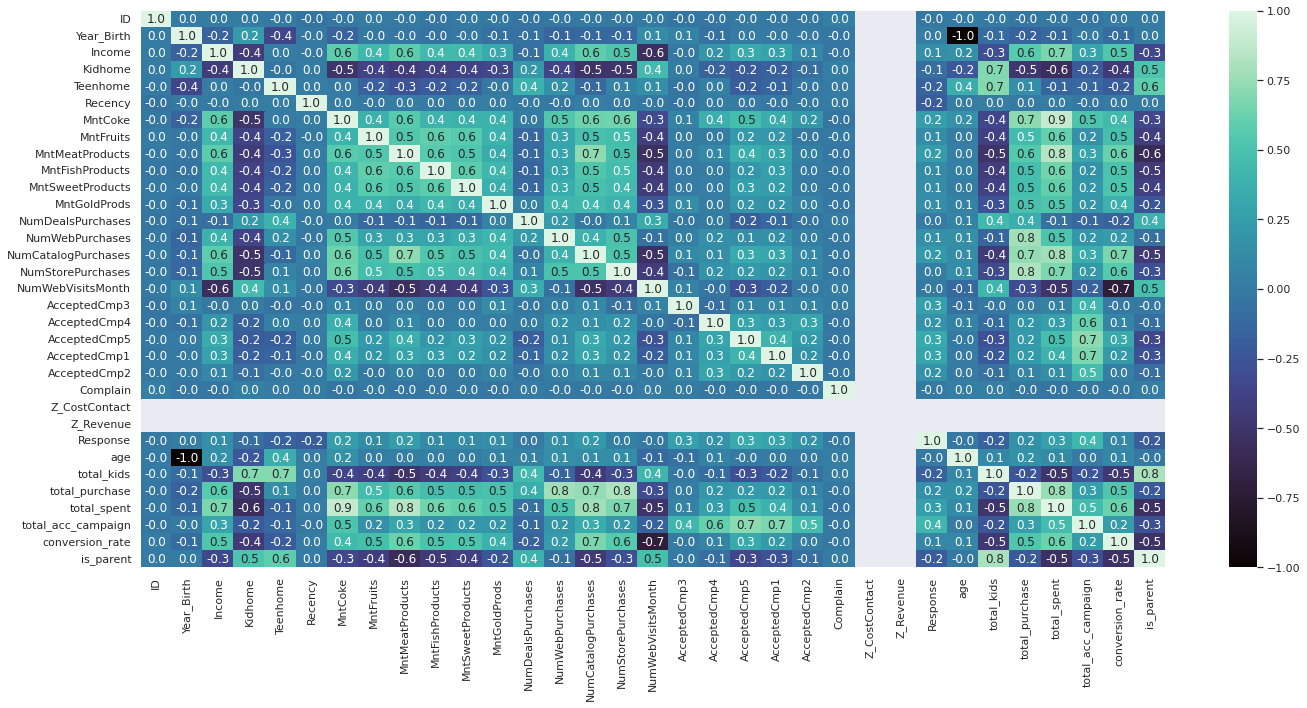

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap = 'mako', annot = True, fmt = '.1f')
plt.tight_layout()

## Income vs Spending 

(0.0, 120000000.0)

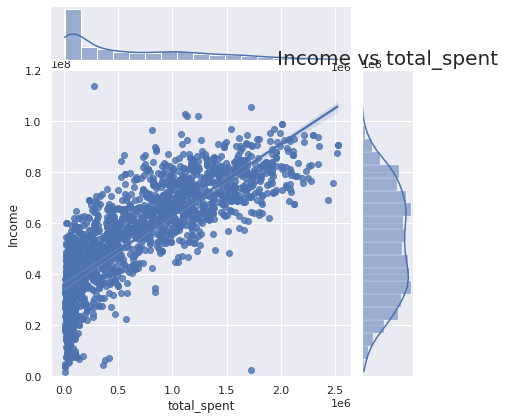

In [ ]:
# income vs spending

plot = sns.jointplot(x = df['total_spent'], y = df['Income'], kind ='reg')
plt.title('Income vs total_spent', fontsize = 20)
plot.ax_marg_y.set_ylim(0, 120000000)

(0.0, 120000000.0)

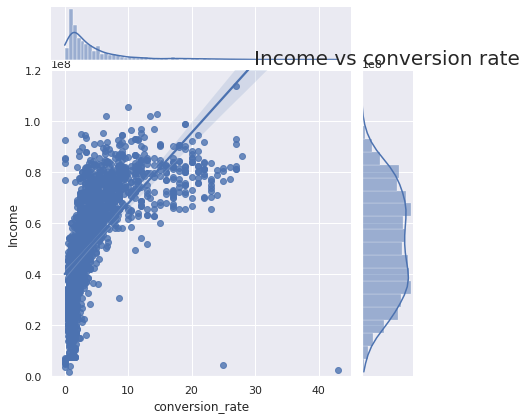

In [ ]:
plot = sns.jointplot(x = df['conversion_rate'], y = df['Income'], kind = 'reg')
plt.title('Income vs conversion rate', fontsize = 20)
plot.ax_marg_y.set_ylim(0, 120000000)

## Age vs Spending and Income

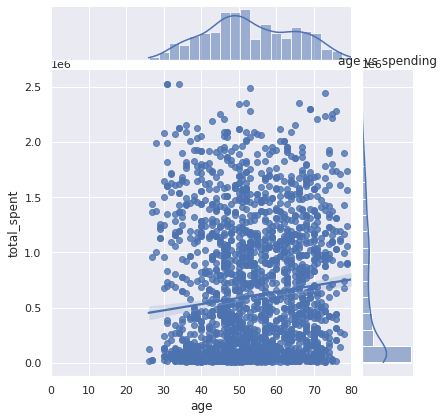

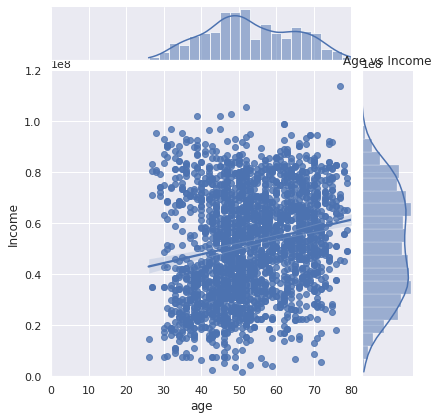

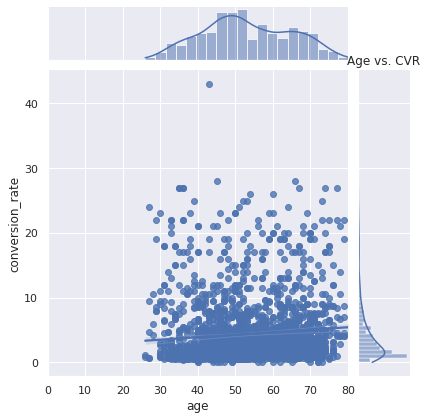

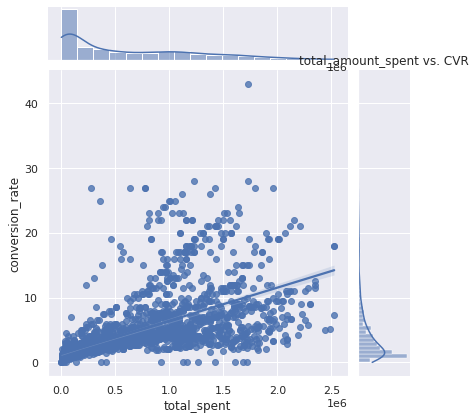

In [ ]:
plot = sns.jointplot(x = df['age'], y = df['total_spent'], kind = 'reg')
plt.title('age vs spending')
plot.ax_marg_x.set_xlim(0,80)
plt.show()

plot = sns.jointplot(x = df['age'], y=df['Income'], kind = 'reg')
plt.title('Age vs Income')
plot.ax_marg_x.set_xlim(0,80)
plot.ax_marg_y.set_ylim(0, 120000000)
plt.show()

plot = sns.jointplot(x=df["age"], y=df["conversion_rate"], kind = 'reg')
plt.title('Age vs. CVR')
plot.ax_marg_x.set_xlim(0, 80)
plt.show()

plot = sns.jointplot(x=df["total_spent"], y=df["conversion_rate"], kind = 'reg')
plt.title('total_amount_spent vs. CVR')
plt.show()

# Data Cleaning & Data Preprocessing

## Handle Null Values

di data sebelumnya, terdapat 24 null value pada kolom income (1% dari total data) yang mana tidak berpengaruh signifikan terhadap keseuruhan data. Sehingga akan kita drop

In [ ]:
#Menghapus kolom bernilai null
df = df.dropna()

In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
age                    0
total_kids             0
total_purchase         0
total_spent            0
total_acc_campaign     0
conversion_rate        0
age_group              0
total_spent_group      0
is_parent              0
Dt_customer            0
dtype: int64

## Handle Duplicate Rows

In [ ]:
df.duplicated().sum()

0

tidak terdapat duplicate data

In [ ]:
df.shape

(2216, 39)

## Feature Encoding

In [ ]:
for column in categorical_features:
    print('value counts of column', column)
    print(df[column].value_counts())
    print('---'*10, '\n')

value counts of column Education
S1     1116
S3      481
S2      365
D3      200
SMA      54
Name: Education, dtype: int64
------------------------------ 

value counts of column Marital_Status
Menikah        857
Bertunangan    573
Lajang         475
Cerai          232
Janda           76
Duda             3
Name: Marital_Status, dtype: int64
------------------------------ 

value counts of column Dt_customer
2012-08-31    12
2012-12-09    11
2013-02-14    11
2014-12-05    11
2013-08-20    10
              ..
2012-05-08     1
2012-11-18     1
2014-09-05     1
2013-06-26     1
2014-09-01     1
Name: Dt_customer, Length: 662, dtype: int64
------------------------------ 

value counts of column age_group
adult    1526
elder     690
Name: age_group, dtype: int64
------------------------------ 

value counts of column total_spent_group
low spending       1105
high spending       556
medium spending     555
Name: total_spent_group, dtype: int64
------------------------------ 

value counts of 

In [ ]:
# label encoder
education_ecd = {
      'SMA' : 0,
      'D3'  : 1,
      'S1'  : 2,
      'S2'  : 3,
      'S3'  : 4
  }

df['education_mapping'] = df['Education'].map(education_ecd)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


## Feature Standardization

In [ ]:
df_scaled = df.copy()


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for col in numerical_features:
    df_scaled[col] = ss.fit_transform(df_scaled[[col]])
    
display(df_scaled.shape, df_scaled.sample(5))

(2216, 40)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,total_kids,total_purchase,total_spent,total_acc_campaign,conversion_rate,age_group,total_spent_group,is_parent,Dt_customer,education_mapping
1250,9606,1965,S3,Menikah,0.704155,-0.823039,-0.928972,27-08-2013,0.517845,1.710616,...,-1.264803,-0.245249,1.541107,2.506003,-0.011748,adult,high spending,0,2013-08-27,4
1968,8537,1949,S1,Janda,0.810404,-0.823039,-0.928972,27-02-2013,0.379636,0.655025,...,-1.264803,0.797881,1.363592,1.033369,1.249919,elder,high spending,0,2013-02-27,2
1875,9612,1987,D3,Lajang,-1.129130,-0.823039,-0.928972,07-02-2014,-1.589832,-0.901675,...,-1.264803,-1.288378,-0.935814,-0.439265,-0.752186,adult,low spending,0,2014-07-02,1
1596,24,1960,S2,Bertunangan,-1.394791,1.039938,0.909066,15-02-2014,1.623511,-0.851268,...,1.405806,-0.375640,-0.929178,-0.439265,-0.547591,elder,low spending,1,2014-02-15,3
506,10584,1976,S1,Menikah,0.533140,-0.823039,0.909066,02-12-2013,0.967022,-0.237483,...,0.070501,1.189055,0.560625,-0.439265,0.738432,adult,medium spending,1,2013-02-12,2


# Data Modeling : K-Means clustering

In [ ]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   float64       
 6   Teenhome             2216 non-null   float64       
 7   Dt_Customer          2216 non-null   object        
 8   Recency              2216 non-null   float64       
 9   MntCoke              2216 non-null   float64       
 10  MntFruits            2216 non-null   float64       
 11  MntMeatProducts      2216 non-null   float64       
 12  MntFishProducts      2216 non-null   float64       
 13  MntSweetProducts     2216 non-nul

[36979.351019560694, 32546.067407692375, 30461.9489326894, 29085.736259598954, 28053.796496348208, 26187.558600424072, 25476.53076771725, 24310.319935379477, 23708.06287803301, 23148.182196493573, 22717.984352180963, 22358.31841799195, 21921.657162355834, 21583.52159633523, 21233.35633160427, 20775.725230261938, 20378.40733901067, 20173.596534132936]


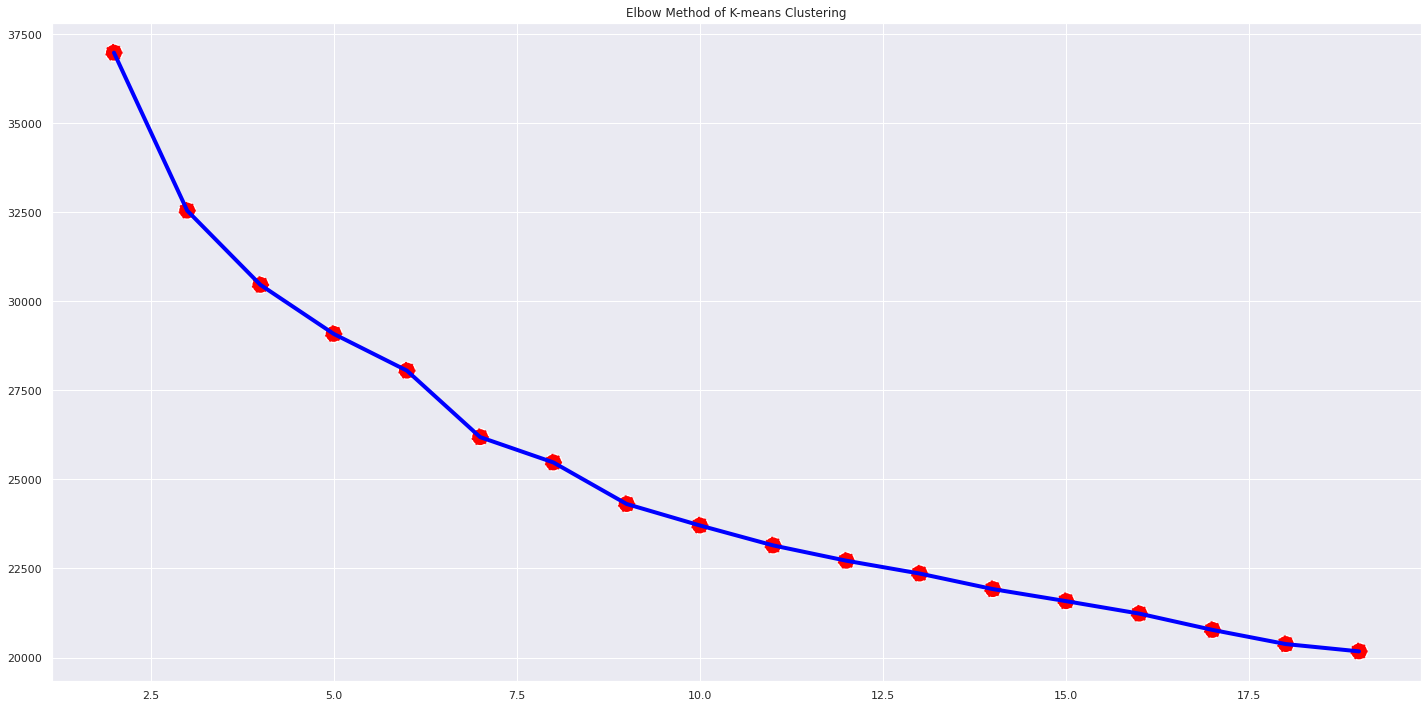

In [ ]:
from sklearn.cluster import KMeans
#copy dataset
X = df_scaled.drop(columns = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer', 'age_group', 'total_spent_group', 'Dt_customer']).copy()
inertia = []


for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X.values)
    inertia.append(kmeans.inertia_)

print(inertia)
plt.figure(figsize=(20, 10))
plt.title('Elbow Method of K-means Clustering')


sns.lineplot(x=range(2, 20), y=inertia, color='blue', linewidth = 4)
sns.scatterplot(x=range(2, 20), y=inertia, s=300, color='red',  linestyle='--')
plt.tight_layout()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X.values)
X['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

In [ ]:
X.head()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,age,total_kids,total_purchase,total_spent,total_acc_campaign,conversion_rate,is_parent,education_mapping,cluster
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,...,1,0.986443,-1.264803,1.319446,1.675488,-0.439265,-0.167630,0,2,3
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,...,0,1.236801,1.405806,-1.157987,-0.962358,-0.439265,-0.652811,1,2,1
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,...,0,0.318822,-1.264803,0.797881,0.280250,-0.439265,0.175797,0,2,3
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,...,0,-1.266777,0.070501,-0.897205,-0.919224,-0.439265,-0.625532,1,2,2
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,...,0,-1.016420,0.070501,0.537099,-0.307044,-0.439265,-0.120865,1,4,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  after removing the cwd from sys.path.


(0.0, 120000000.0)

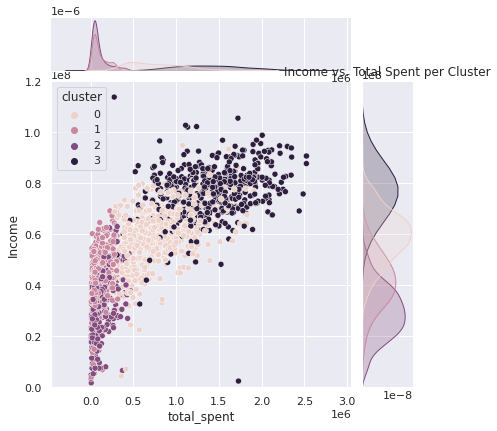

In [ ]:
plot = sns.jointplot(x=df["total_spent"], y=df["Income"], hue=df["cluster"])
plt.title('Income vs. Total Spent per Cluster')
plt.rcParams['figure.figsize']=(20,5)
plt.tight_layout()
plot.ax_marg_y.set_ylim(0, 120000000)

## Eval : Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2,10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

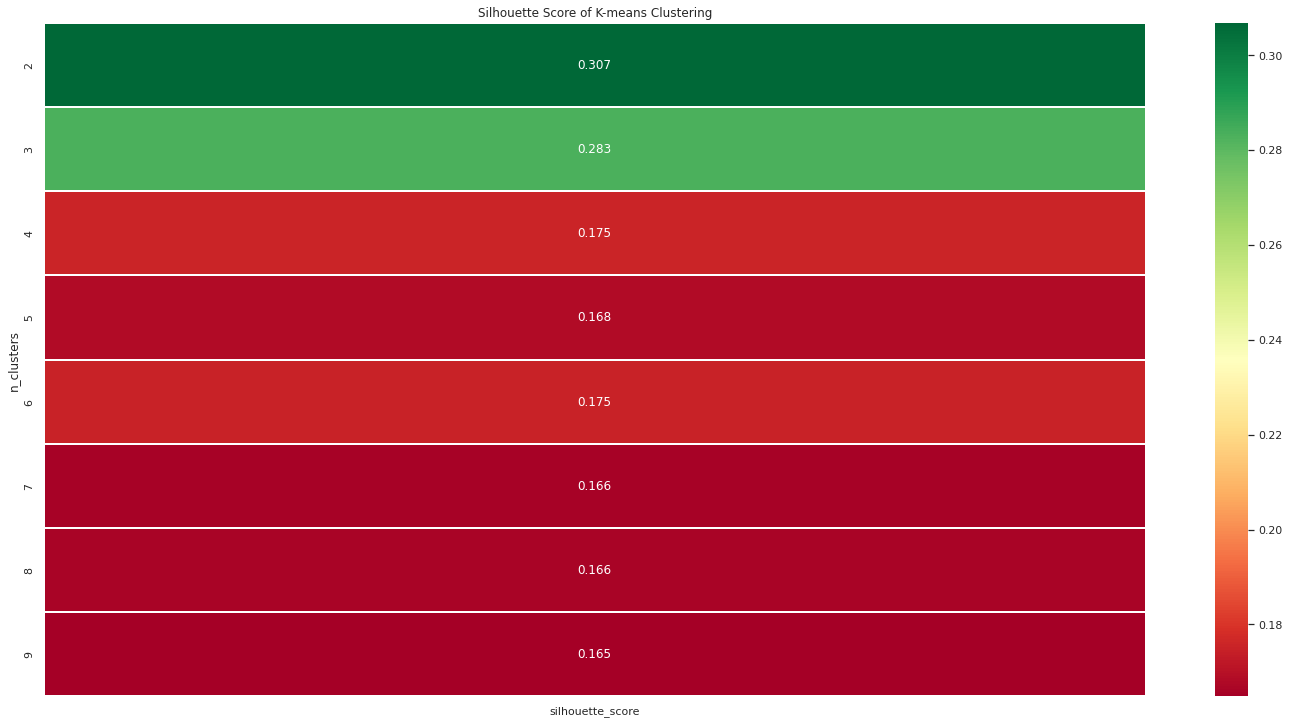

In [ ]:
visualize_silhouette_layer(X)

# Customer Personality Analysis for Marketing Retargetting

## Cluster Analysis& Interpretation

In [ ]:
numerical_features

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntCoke',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'age',
 'total_kids',
 'total_purchase',
 'total_spent',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'conversion_rate',
 'total_acc_campaign']

In [ ]:
df[numerical_features + ['cluster']].groupby('cluster')['Income', 'total_spent'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Income                                                      \
          count          mean           std         min         25%   
cluster                                                               
0        1046.0  3.535471e+07  1.449543e+07   1730000.0  26168500.0   
1          21.0  4.524229e+07  1.922316e+07  15716000.0  36640000.0   
2         528.0  7.803978e+07  2.830126e+07   2447000.0  70632750.0   
3         621.0  5.900771e+07  1.102697e+07   4428000.0  52531000.0   

                                             total_spent                \
                50%         75%          max       count          mean   
cluster                                                                  
0        34824000.0  43292250.0  162397000.0      1046.0  1.031874e+05   
1        38998000.0  58113000.0   83257000.0        21.0  3.764286e+05   
2        77184000.0  82572250.0  666666000.0       528.0  1.403739e+06   
3        59462000.0  65991000.0   94871000.0       621.0  7.862576e+05   

                                                                              
                   std       min        25%        50%        75%        max  
cluster                                                                       
0         92354.607180    5000.0    39000.0    66000.0   139000.0   460000.0  
1        432101.327402   11000.0    54000.0    92000.0   637000.0  1365000.0  
2        424232.987819   62000.0  1101750.0  1380500.0  1686500.0  2525000.0  
3        349861.158582  241000.0   493000.0   728000.0  1013000.0  1910000.0

In [ ]:
map_cluster = {
    0 : 'Risk of Churn',
    1 : 'Low Spender',
    2 : 'High Spender',
    3 : 'Mid Spender'
}

df['cluster_mapped'] = df['cluster'].map(map_cluster)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

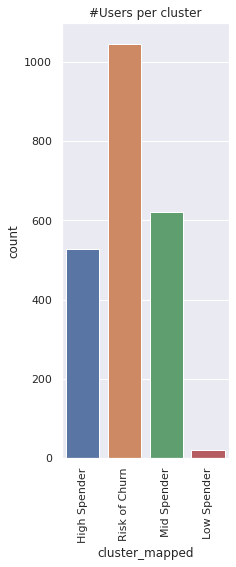

In [ ]:
sns.set(rc={'figure.figsize':(3,8)})
sns.countplot(x=df['cluster_mapped'])
plt.title('#Users per cluster')
plt.xticks(rotation=90)

In [ ]:
df['cluster_mapped'].value_counts()

Risk of Churn    1046
Mid Spender       621
High Spender      528
Low Spender        21
Name: cluster_mapped, dtype: int64

(0.0, 120000000.0)

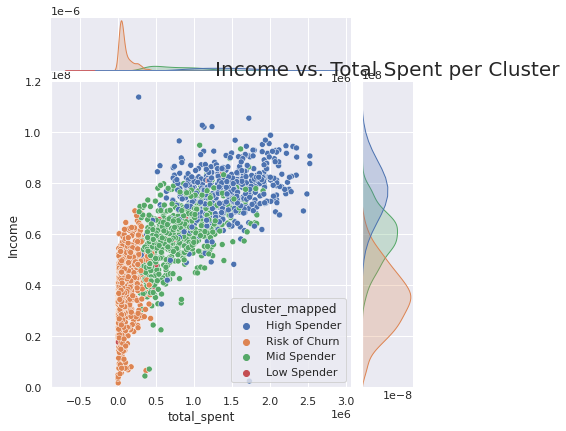

In [ ]:
plot = sns.jointplot(x=df['total_spent'], y=df['Income'], hue=df['cluster_mapped'])
plt.title('Income vs. Total Spent per Cluster', size = 20)
plot.ax_marg_y.set_ylim(0, 120000000)

### Total income per cluster

(0.0, 120000000.0)

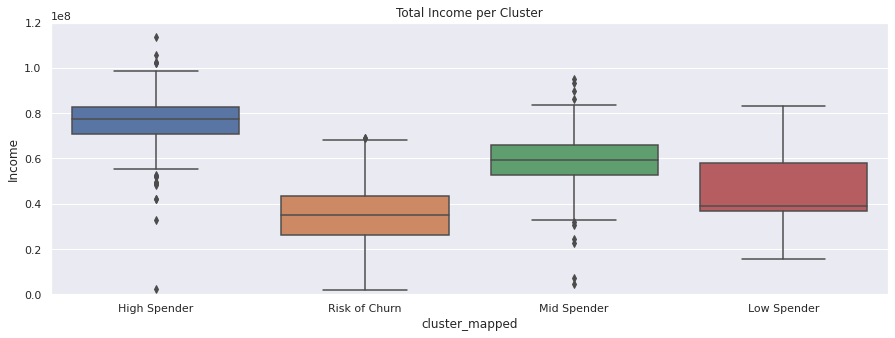

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['cluster_mapped'], y=df['Income'])
plt.title('Total Income per Cluster')
plt.ylim(0, 120000000)

### total spending per cluster

Text(0.5, 1.0, 'Total Amount Spent per Cluster')

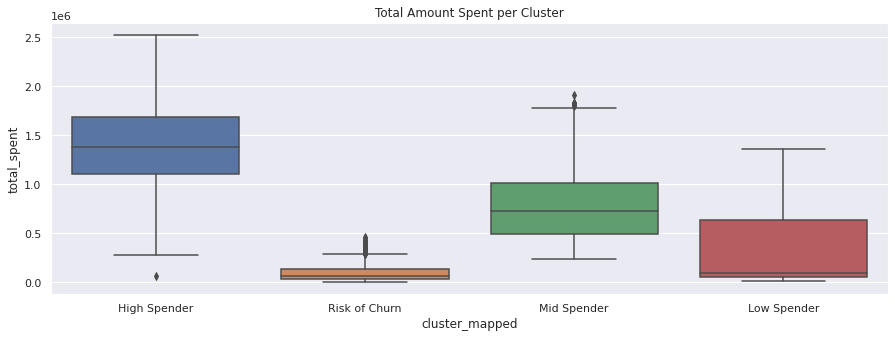

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['cluster_mapped'], y=df['total_spent'])
plt.title('Total Amount Spent per Cluster')

### total visits per cluster

Text(0.5, 1.0, 'Total Visit Web per Cluster')

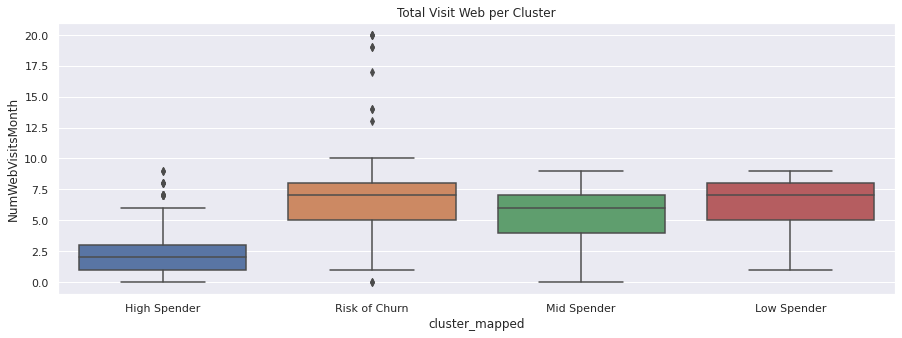

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['cluster_mapped'], y=df['NumWebVisitsMonth'])
plt.title('Total Visit Web per Cluster')

### Deal purchased per cluster

Text(0.5, 1.0, 'Deal Puchased per Cluster')

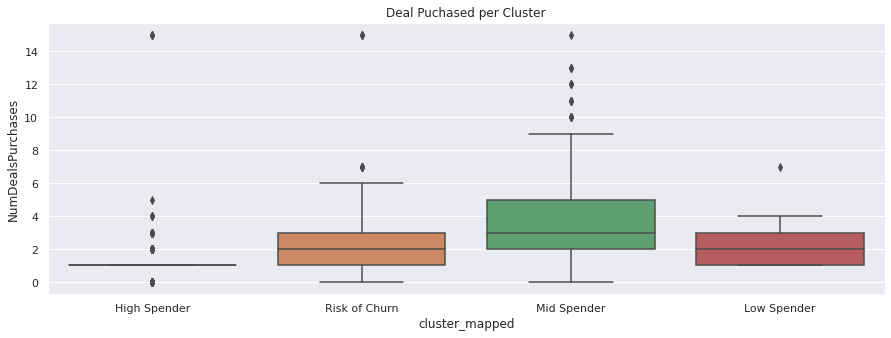

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['cluster_mapped'], y=df['NumDealsPurchases'])
plt.title('Deal Puchased per Cluster')

### conversion per cluster

Text(0.5, 1.0, 'Conversion Rate per Cluster')

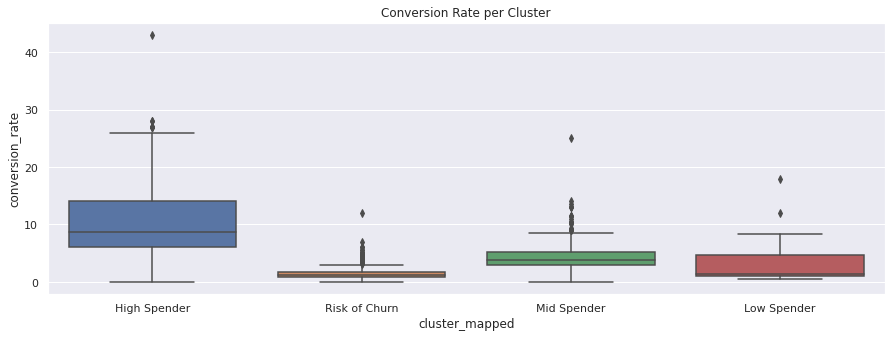

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['cluster_mapped'], y=df['conversion_rate'])
plt.title('Conversion Rate per Cluster')

# Interpretasi Cluster

1. Risk of Churn:


*   Kelompok ini adalah kelompok dengan jumlah user terbesar yaitu 1046 orang.
*   Dari segi pendapatan dan pengeluaran, kelompok ini mempunyai rerata pendapatan dan pengeluaran paling kecil setiap bulannya
* Namun, kelompok ini paling sering mengunjungi web dengan median 7.5 kali dalam sebulan, walaupun mereka masih jarang bertransaksi bahkan menggunakan promo pada transaksinya
* Dapat dilihat dari conversion rate, Campaign yang ditujukan kepada mereka juga tidak memberikan hasil yang signifikan 

2. Low Spender:


*   List ini adalah kelompok dengan jumlah user terkecil yaitu 21 orang.
* Kelompok ini mengunjungi website paling sering seperti cluster risk of churn
* Namun, kelompok ini mempunyai total pendapatan dan pengeluaran terkecil dibanding yang lainnya

3. Mid Spender:

*   kelompok ini adalah kelompok dengan jumlah user terbanyak kedua yaitu 621 orang
*   Kelompok ini memiliki total pendapatan dan pengeluaran terbesar kedua diantara cluster lain
* Walaupun menjadi kelompok paling jarang visit web, kelompok ini yang paling banyak melakukan transaksi

4. High Spender:
* Kelompok ini adalah kelompok dengna jumlah user paling banyak ketiga yaitu 528 orang
* kelompok ini memiliki total pendapatan dan pengeluaran terbesar 
kelompok ini memiliki conversion rate terbesar untuk membeli produk kita, sehaingga jangan sampai kehilangan mereka.



# Recommendation & Potential Impact



Rekomendasi
1. Untuk kelompok low spender dan risk to churn, mulai dilakukan analisis lebih lanjut bagaimana meningkatkan converion ratio karena mereka memiliki jumlah visit yang cukup tinggi namun tidak ber transaksi
2. Untuk kelompok mid spencer dapat dilakukan analisis lebih dalam agar bisa semakin mengoptimalkan conversion rate mereka dan tetap berbelanja di platform kita
3. Untuk kelompok high spender, perlu close monitoring agar tidak churn


Potensial Impact
1. Jika kita fokus untuk meningkatkan layanan dan close monitoring ke kelompok High spender, kita akan mendapatkan potential revenue sebesar IDR 741 juta
2. Jika kita fokus menganalisa mid spender, maka kita akan mendapatkan potensial revenue sebesar IDR 488 juta

In [ ]:
df[df.cluster == 3].total_spent.sum()

488266000

In [ ]:
df[df.cluster == 2].total_spent.sum()

741174000